# Metode Euler Eksplisit, Euler Implisit, RK-2, dan RK-4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

    y (solusi) Euler Explisit   y (solusi) Euler Implisit   \
0                     1.000000                    1.000000   
1                     0.900000                    0.909091   
2                     0.810000                    0.826446   
3                     0.729000                    0.751315   
4                     0.656100                    0.683013   
5                     0.590490                    0.620921   
6                     0.531441                    0.564474   
7                     0.478297                    0.513158   
8                     0.430467                    0.466507   
9                     0.387420                    0.424098   
10                    0.348678                    0.385543   
11                    0.313811                    0.350494   
12                    0.282430                    0.318631   
13                    0.254187                    0.289664   
14                    0.228768                    0.263331   
15      

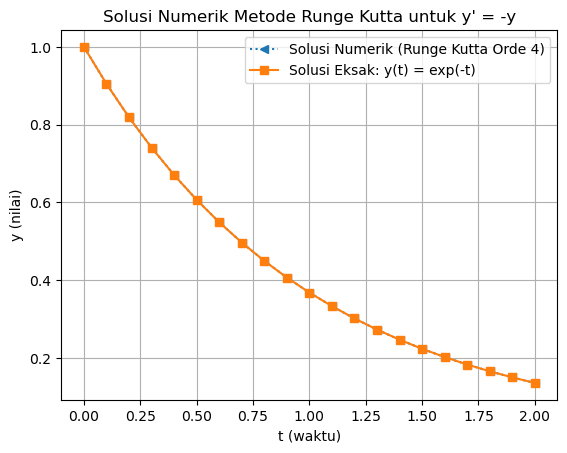

In [33]:
# Parameter
t0 = 0  # Waktu awal
tn = 2  # Waktu akhir
N = 20  # Jumlah langkah
h = (tn - t0) / N  # Ukuran langkah
y0 = 1  # Nilai awal dari y

def f(t,y):
    return -y  # Contoh fungsi y' = -t, sesuaikan sesuai kebutuhan

def euler_explicit(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    selisih = []

    for n in range(N):
        t = t_values[-1]
        y = y_values[-1]
        
        y_new = y + h * f(t,y)  # Metode Euler
        t_new = t + h

        y_exact = math.exp(-1 * t_new)
        
        error = abs(y_exact - y_new) 

        t_values.append(t_new)
        y_values.append(y_new)
        selisih.append(error)

    return t_values, y_values, selisih


import math

def euler_implicit(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    selisih = []

    for n in range(N):
        t = t_values[-1]
        y = y_values[-1]
        t_new = t + h

        # Euler implicit step
        y_new = y / (1 + h)

        # Exact solution at t_new
        y_exact = math.exp(-1 * t_new)
        
        # Compute error
        error = abs(y_exact - y_new)
        
        # Append new values to lists
        t_values.append(t_new)
        y_values.append(y_new)
        selisih.append(error)

    return t_values, y_values, selisih

def runge_kutta_2(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    selisih = []
    
    for i in range(N):
        t = t_values[-1]
        y = y_values[-1]
        
        # Perhitungan k1 dan k2 dengan memperhatikan f(t, y)
        k1 =h * f(t, y)            # k1 dihitung berdasarkan f(t, y)
        k2 = h * f(t + h, y + k1)   # k2 dihitung menggunakan t + h dan y + k1
        
        # Update y dan t menggunakan formula RK2
        y_new = y + 0.5 * (k1 + k2)
        t_new = t + h

        y_exact = math.exp(-1 * t)
        error = abs(y_exact - y_new)
        
        t_values.append(t_new)
        y_values.append(y_new)
        selisih.append(error)

    return t_values, y_values, selisih

def runge_kutta_4(t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    selisih = []
    for n in range(N):
        t = t_values[-1]
        y = y_values[-1]
    
        k1 = f(t, y)
        k2 = f(t + 0.5 * h, y + 0.5 * h  * k1)
        k3 = f(t + 0.5 * h, y + 0.5 * h  * k2)
        k4 = f(t + h, y + h * k3)
        
        t_new = t + h
        y_new = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

        y_exact = math.exp(-1 * t)
        error = abs(y_exact - y_new)
    
        t_values.append(t_new)
        y_values.append(y_new)
        selisih.append(error)
    
    return t_values, y_values, selisih

def print_iteration_table(y, selisih):
    iter_nums = np.arange(0, len(y))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'y': y,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |y - f(t,y)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi
    

# Inisialisasi
t_values, y_values, selisih = euler_explicit(t0, y0, h, N) # Mengembalikan nilai t_values & y_values dari fungsi ke variable t_values & y_values
t_values2, y_values2, selisih2 = euler_implicit(t0, y0, h, N)
t_values3, y_values3, selisih3 = runge_kutta_2(t0, y0, h, N)
t_values4, y_values4, selisih4 = runge_kutta_4(t0, y0, h, N)

y_exact = [math.exp(-1 * t) for t in t_values]

# Buat DataFrame untuk menampilkan tabel
data = {
    "y (solusi) Euler Explisit ": y_values[:-1],
    "y (solusi) Euler Implisit ": y_values2[:-1],
    "y (solusi) Runge Kutta Order 2": y_values3[:-1],
    "y (solusi) Runge Kutta Order 4": y_values4[:-1],
    "Error (E.E) (y eksak - y prediksi)":  selisih,
    "Error (E.I) (y eksak - y prediksi)":  selisih2,
    "Error (RK2) (y eksak - y prediksi)":  selisih3,
    "Error (RK4) (y eksak - y prediksi)":  selisih4,
    
}

df = pd.DataFrame(data)

# Tampilkan tabel
print(df)

print(f"Ini adalahh nilai t akhir (explicit): {t_values[-1]}")
print(f"Ini adalahh nilai y akhir (explicit): {y_values[-1]}")
print(f"Ini adalahh nilai t akhir (implicit): {t_values2[-1]}")
print(f"Ini adalahh nilai y akhir (implicit): {y_values2[-1]}")
print(f"Ini adalahh nilai t akhir (rk2): {t_values3[-1]}")
print(f"Ini adalahh nilai y akhir (rk2): {y_values3[-1]}")
print(f"Ini adalahh nilai t akhir (rk4): {t_values4[-1]}")
print(f"Ini adalahh nilai y akhir (rk4): {y_values4[-1]}")

# Plot hasil
#plt.plot(t_values, y_values, 'o:', label="Solusi Numerik (Euler Explicit)")
#plt.plot(t_values2, y_values2, 'v:', label="Solusi Numerik (Euler Implicit)")
#plt.plot(t_values3, y_values3, '>:', label="Solusi Numerik (Runge Kutta Orde 2)")
plt.plot(t_values4, y_values4, '<:', label="Solusi Numerik (Runge Kutta Orde 4)")
plt.plot(t_values, y_exact, label="Solusi Eksak: y(t) = exp(-t)", linestyle='-', marker='s')

plt.xlabel("t (waktu)")
plt.ylabel("y (nilai)")
plt.title("Solusi Numerik Metode Runge Kutta untuk y' = -y")
plt.legend()
plt.grid(True)
plt.show()

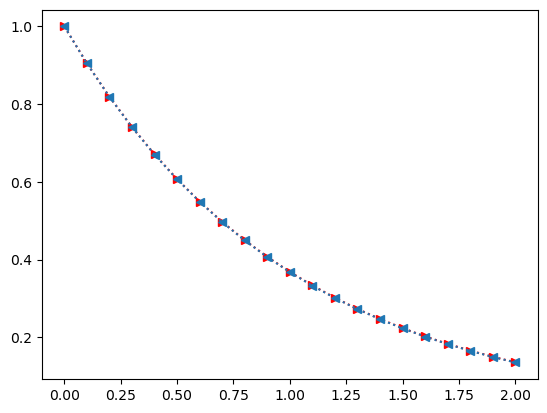

In [4]:
plt.plot(t_values3, y_values3, '>:', color="red", label="Solusi Numerik (Runge Kutta Orde 2)")
plt.plot(t_values4, y_values4, '<:', label="Solusi Numerik (Runge Kutta Orde 2)")

In [21]:
print(y_exact)

[1.0, 0.9048374180359595, 0.8187307530779818, 0.7408182206817179, 0.6703200460356393, 0.6065306597126334, 0.5488116360940265, 0.4965853037914095, 0.4493289641172216, 0.40656965974059917, 0.3678794411714424, 0.3328710836980796, 0.30119421191220214, 0.2725317930340126, 0.24659696394160643, 0.2231301601484298, 0.20189651799465536, 0.18268352405273458, 0.16529888822158645, 0.14956861922263498, 0.13533528323661262]
